# lesson 1 
https://www.youtube.com/watch?v=8SF_h3xF3cE&t=385s&ab_channel=JeremyHoward

In [1]:
from fastbook import *
from tqdm import tqdm

In [6]:
# search for imagse in duckduckgo
urls = search_images_ddg('bird photos',max_images=1)
len(urls),urls[0]

(1,
 'https://milliontrees.files.wordpress.com/2014/08/eastern_bluebird-public-domain.jpg')

In [10]:
??download_url

In [9]:
dest = Path("bird.jpg")
if not dest.exists(): download_url(urls[0],dest)

(1024, 1024)


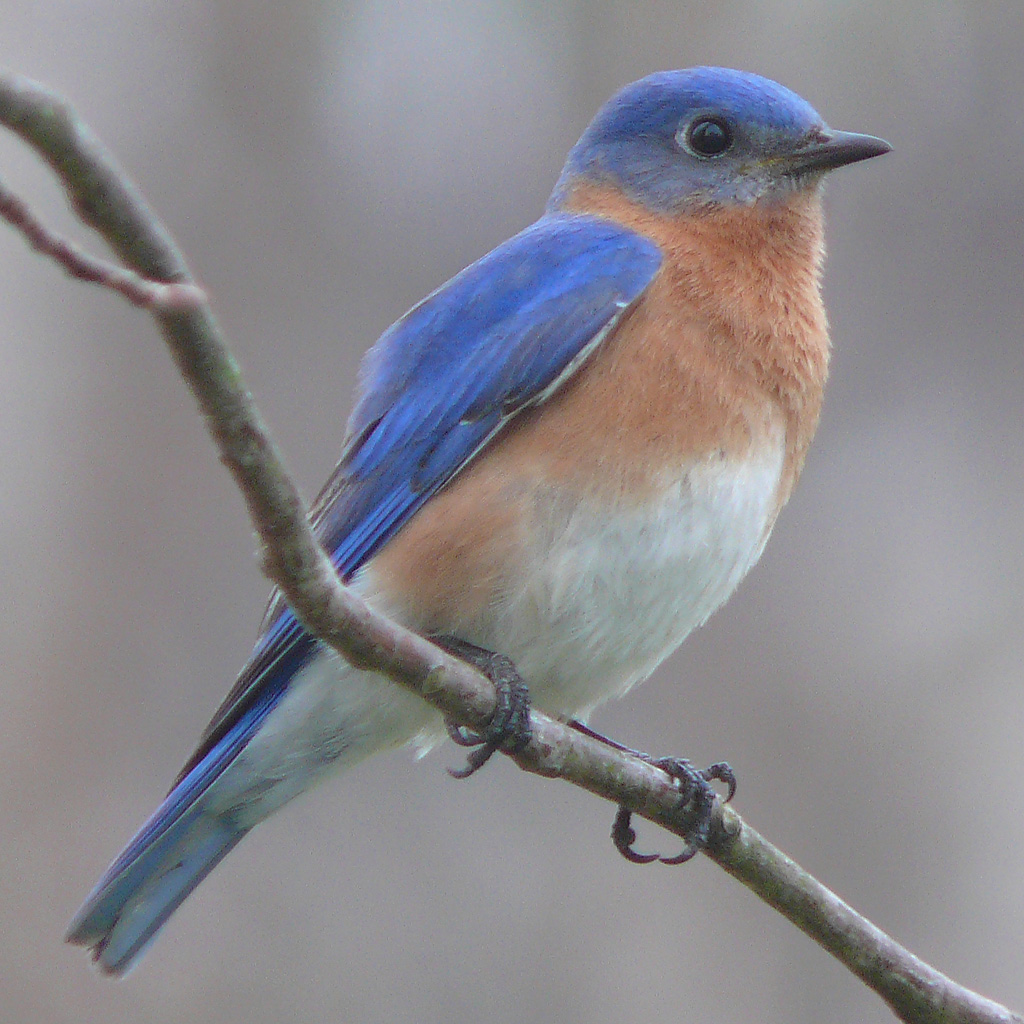

In [14]:
image=Image.open(dest)
print(image.size)
image

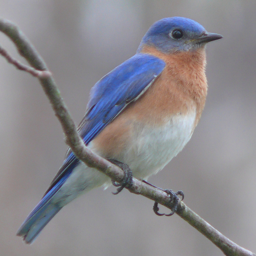

In [12]:
image.to_thumb(256,256)

In [ ]:
dest = Path("bird.jpg")
if not dest.exists(): download_url(urls[0],dest)

# chair or table classifier - binary classification

In [ ]:
classes=['chair','table']
path=Path('chair_or_table_dataset')
num_images=300

for c in classes:
    for i in range(num_images):
        dest=(path/c/f'{c}_{i}.jpg')
        search_results=search_images_ddg(f'{c} photo',max_images=num_images)
        for s in search_results:
            try:
                download_url(s,dest)
            except:
                continue
                
                
#             resize_images(dest,max_size=256,dest=dest)
        
# #check for broken links    `    
# failed=verify_images(get_image_files(path))
# failed.map(Path.unlink)

In [13]:
searches=['forest','bird']
path=Path('bird_or_not')

path.mkdir(parents=True,exist_ok=True)
dest=path/'forest'
dest.mkdir(exist_ok=False)

In [2]:
classes=['chair','table']
path=Path('chair_or_table_dataset')
path.mkdir(parents=True,exist_ok=True)

for c in tqdm(classes):
    dest=path/c
    dest.mkdir(exist_ok=True)
    results=search_images_ddg(f'{c} photo')
    download_images(dest,urls=results[:200])
    resize_images(dest,max_size=400,dest=dest)

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [04:28<00:00, 134.34s/it]


In [3]:
#check for broken links    `    
failed=verify_images(get_image_files(path))
failed.map(Path.unlink)

(#23) [None,None,None,None,None,None,None,None,None,None...]

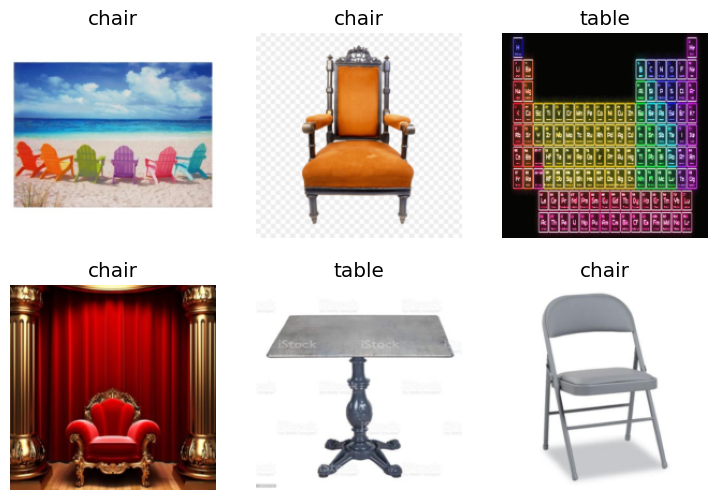

In [6]:
dls=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label, #returns the parent folder name of the image
    item_tfms=[Resize(192,method='squish')] #crop or squish
).dataloaders(path)

dls.show_batch(max_n=6)
#periodic table shows how this method of creating dataset can be quite buggy

In [7]:
learn=cnn_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(3)

C:\Users\Palaash.HPZ\anaconda3\envs\pytorch_env\lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
C:\Users\Palaash.HPZ\anaconda3\envs\pytorch_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Palaash.HPZ\anaconda3\envs\pytorch_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.923297,1.483237,0.292683,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.456770,0.499159,0.158537,00:03
1,0.292752,0.218684,0.097561,00:02
2,0.205363,0.113823,0.060976,00:02


In [13]:
??download_images

In [16]:
??download_url

In [17]:
c='chair'
sample_chair_result=search_images_ddg(f'{c} photo',max_images=1)
print(sample_chair_result)

dest_='C:/Users/Palaash.HPZ/Desktop/jupyter_notebooks/fast ai DL course 1/chair_or_table_dataset/sample_chair.jpg'
download_url(url=sample_chair_result[0],dest=dest_)

['https://www.reelhaus.com/wp-content/uploads/2015/07/rh_chairs-DSC_8378.jpg']


Path('C:/Users/Palaash.HPZ/Desktop/jupyter_notebooks/fast ai DL course 1/chair_or_table_dataset/sample_chair.jpg')

In [19]:
is_chair,_,probs=learn.predict(PILImage.create(dest_))
print(f'This is predicted as a: {is_chair}')
print(f'Probability it is a chair: {probs[0]:.4f}')

This is predicted as a: chair
Probability it is a chair: 0.9998


# multi class classification